In [ ]:
import cv2
import os
import sys
import pathlib
import numpy as np
import pandas as pd
from keras.layers import Dense, Conv2D, Flatten
from sklearn.utils import shuffle
from keras.optimizers import Adam
from skimage.filters import sobel
from keras.utils import to_categorical
from skimage.segmentation import watershed
# from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from glob import glob
from google.colab import drive
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
train_path = "/content/gdrive/MyDrive/ProcessedData/Train"

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in inception.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/gdrive/MyDrive/ProcessedData/Train/*')

In [ ]:
len(folders)

2

In [ ]:
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.3,
                                   zoom_range = 0.4,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
##no need to apply the above data aug steps in test_set, applied in training to populate the set

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/gdrive/MyDrive/ProcessedData/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 695 images belonging to 2 classes.


In [ ]:
# Make sure you provide the same target size as initialied for the image size
test_set = test_datagen.flow_from_directory('/content/gdrive/MyDrive/ProcessedData/Test',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 262 images belonging to 2 classes.


In [ ]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
44/44 [==============================] - 15s 330ms/step - loss: 1.5147 - accuracy: 0.8029 - val_loss: 4.5467 - val_accuracy: 0.6374
Epoch 2/10
44/44 [==============================] - 14s 312ms/step - loss: 0.8629 - accuracy: 0.8417 - val_loss: 3.5476 - val_accuracy: 0.5878
Epoch 3/10
44/44 [==============================] - 14s 310ms/step - loss: 0.7203 - accuracy: 0.8446 - val_loss: 3.4315 - val_accuracy: 0.5763
Epoch 4/10
44/44 [==============================] - 14s 307ms/step - loss: 1.2016 - accuracy: 0.7986 - val_loss: 9.4387 - val_accuracy: 0.5534
Epoch 5/10
44/44 [==============================] - 14s 312ms/step - loss: 1.6864 - accuracy: 0.8000 - val_loss: 6.0600 - val_accuracy: 0.5687
Epoch 6/10
44/44 [==============================] - 14s 313ms/step - loss: 1.1176 - accuracy: 0.8201 - val_loss: 5.3245 - val_accuracy: 0.5611
Epoch 7/10
44/44 [==============================] - 14s 311ms/step - loss: 0.7502 - accuracy: 0.8489 - val_loss: 4.7376 - val_accuracy: 0.5687

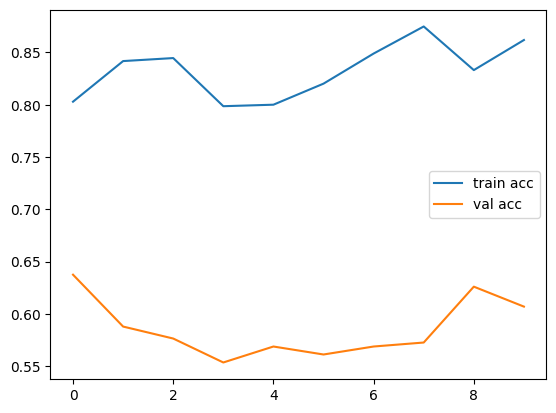

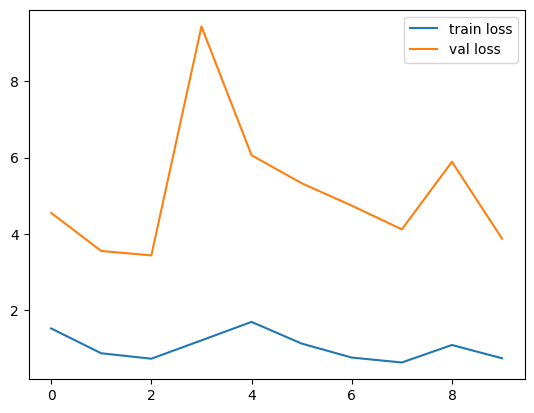

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


In [ ]:
# !pip install pandas tabulate
# !pip install seaborn

# Import libraries
import cv2
import os
import sys
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from sklearn.utils import shuffle
from keras.optimizers import Adam
from skimage.filters import sobel
from keras.layers import MaxPool2D
from keras.models import Sequential
from keras.utils import to_categorical
from skimage.segmentation import watershed
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from google.colab.patches import cv2_imshow

In [ ]:
# Define the folder to store cropped images
output_folder = "cropped_cells"

# Create the folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Read the image
img = cv2.imread('/content/Scan.jpeg')
# Replace with the actual path to your image

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply denoising
# denoised = cv2.fastNlMeansDenoising(img, None, 30, 7, 21)

# Apply edge detection using Canny
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Initialize an empty list to store cropped images
cropped_images = []

# Define additional filters for valid cells
min_area = 1000  # Minimum area for a valid cell
max_aspect_ratio = 5  # Maximum aspect ratio for a valid cell
crop_offset = 5

# Loop through all contours and filter based on area and aspect ratio

i = 1
print(f"Successfully extracted and saved {i-1} cell images to '{output_folder}' folder.")

# Loop through all contours and filter based on area and aspect ratio
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h
    if cv2.contourArea(contour) < min_area or aspect_ratio > max_aspect_ratio:
        continue

    # Crop the region of interest (ROI) from the original image
    cropped_image = img[y+crop_offset:y+h-(crop_offset), x+crop_offset:x+w-(crop_offset)]

    # Convert to grayscale if needed
    updated_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

    # Save the cropped image with a unique filename
    output_filename = os.path.join(output_folder, f"cell_{i}.jpg")
    cv2.imwrite(output_filename, cropped_image)
    i += 1

    # Append the cropped image to the list
    cropped_images.append(updated_image)

# Calculate number of rows and columns for displaying all images
# n_rows = int(np.ceil(len(cropped_images) ** 0.5))
# n_cols = int(np.ceil(len(cropped_images) / n_rows))

n_rows = 5
n_cols = 5

# Display all cropped images
plt.figure(figsize=(15, 10))
for i, image in enumerate(cropped_images):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Cell {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

# Delete the cropped images
# !rm -r cropped_cells